<a href="https://colab.research.google.com/github/jimmyjamesarnold/notebooks/blob/master/ALY6080_Lecture_5_Classification_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Purpose

To introduce the practical classification methods in Python using common DS tools

Intro to LogReg: https://youtu.be/yIYKR4sgzI8?t=187


![Welcome to scikit-learn](https://scikit-learn.org/stable/_static/ml_map.png)

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Load libraries and dataset

Here I'm going to show Logistic Regression. 

Others to consider... Support Vector Machines, KNN, Naive Bayes and Random Forest Classifiers.
See: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning



In [0]:
# first load sklearn dataset, test_train_split, classifiers, and metrics
# we'll be using the iris dataset - a lot of examples here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

from sklearn.datasets import load_iris

# import some data to play with:
# review docs, X = features, y = labels
iris = load_iris()

# get full description
print(iris.DESCR)

In [0]:
# split the data into features (X) and labels (y)
X = iris.data
y = iris.target

# easier access:
#X, y = load_iris(return_X_y=True)

# Then, split into training and testing data:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# what does this data look like? 

# take first 10 entries:
X_train[:10,]

array([[5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ]])

In [20]:
# from the docs, we know these are features of: 
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [23]:
# similiarly, the classes and class labels are:
y_train[:10,]

array([1, 2, 2, 1, 2, 1, 2, 1, 0, 2])

In [24]:
#which relate to labels:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
# OK, skipping any EDA, feature engineering / selection, and preprocessing - but these are SUPER IMPORTANT!!!

# right to the model
# docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# import model
from sklearn.linear_model import LogisticRegression

# instantiate
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial')

# fit training data
logreg.fit(X_train, y_train)

# make a prediction with test set
y_pred = logreg.predict(X_test)

# options: hyperparameter tuning, and cross-validation

Now we need to a way to evaluate how well the model works. 
We'll use the classification report and the confusion matrix.

Because there are 3 classes, we'll need to use the multiclass unique_labels, too.

I also need np and plt for calculations and plotting... load those too

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# got code from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


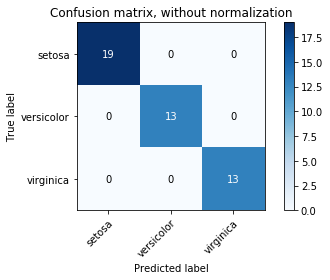

In [49]:
# provide class names which we saw earlier

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=iris.target_names,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


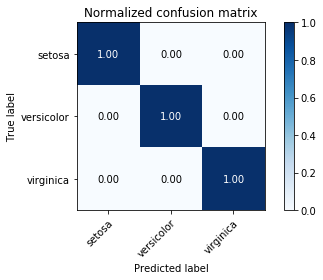

In [50]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=iris.target_names, normalize=True,
                      title='Normalized confusion matrix')

![important metrics](https://cdn-images-1.medium.com/max/1250/1*pOtBHai4jFd-ujaNXPilRg.png)

In [52]:
# Let's get the classification report...
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [56]:
# ok, this example is a little ridiculous, you never get perfect results in reality...
# let's try doing some feature reduction... 
# see docs: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

from sklearn.feature_selection import RFE

# we'll get top feature recursively:
rfe = RFE(estimator=logreg, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)

# inspect important features
print(iris.feature_names)
print(rfe.support_)
print(rfe.ranking_)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[False False  True False]
[4 3 1 2]


Based on this, it looks like 'petal length (cm)' and  'petal width (cm)' are the most important features. 

Let's see what it looks like if we only use those to predict.

In [0]:
y_rfe_pred = rfe.predict(X_test)

In [58]:
# Let's get the classification report...
print(classification_report(y_test, y_rfe_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



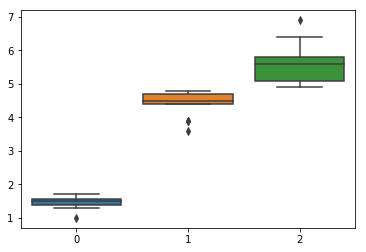

In [71]:
# I find that super suspicious... using only 1 feature we can get perfect classification...? 
# inspect visually:
import seaborn as sns

# python uses 0-indexing. So 3rd feature has index of 2!

# make boxplot to visual distribution
sns.boxplot(x=y_test, y=X_test[:,2])

OK, given what's you've seen, what can you find with 